`DataPreprocessing`

In [396]:
import pandas as pd 
import numpy as np
import os
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### load Data

In [397]:
folder = r"C:\Users\USER\Downloads"
filename = 'df_final.csv'
path = os.path.join(folder, filename)

data = pd.read_csv(path)
print(data.head())

   id       name  gender   age age_group       city         profession  cgpa  \
0   1      Vivan       0  26.0     26-35   Varanasi            teacher   0.0   
1   3     Yuvraj       0  22.0     18-25     Mumbai            teacher   0.0   
2   5       Vani       1  59.0     56-65  Ahmedabad  financial analyst   0.0   
3   8  Aishwarya       1  24.0     18-25  Bangalore            student   5.9   
4  10    Utkarsh       0  55.0     46-55     Rajkot  software engineer   0.0   

  degree  work_study_pressure  work_study_satisfaction  financial_stress  \
0    LLB                  4.0                      3.0               3.0   
1    BBA                  5.0                      1.0               1.0   
2    MCA                  2.0                      5.0               5.0   
3    BSc                  2.0                      5.0               2.0   
4    BSc                  3.0                      2.0               4.0   

  sleep_duration dietary_habits  work_study_hours  family_mh_h

In [398]:
# 결측값 확인
data.isnull().sum()

id                         0
name                       0
gender                     0
age                        0
age_group                  0
city                       0
profession                 0
cgpa                       0
degree                     0
work_study_pressure        0
work_study_satisfaction    0
financial_stress           0
sleep_duration             0
dietary_habits             0
work_study_hours           0
family_mh_history          0
suicidal_thoughts          0
depression                 0
urban_rural                0
dtype: int64

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51880 entries, 0 to 51879
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       51880 non-null  int64  
 1   name                     51880 non-null  object 
 2   gender                   51880 non-null  int64  
 3   age                      51880 non-null  float64
 4   age_group                51880 non-null  object 
 5   city                     51880 non-null  object 
 6   profession               51880 non-null  object 
 7   cgpa                     51880 non-null  float64
 8   degree                   51880 non-null  object 
 9   work_study_pressure      51880 non-null  float64
 10  work_study_satisfaction  51880 non-null  float64
 11  financial_stress         51880 non-null  float64
 12  sleep_duration           51880 non-null  object 
 13  dietary_habits           51880 non-null  object 
 14  work_study_hours      

In [400]:
data['gender'].value_counts()

gender
0    29425
1    22455
Name: count, dtype: int64

In [401]:
data['age_group'].value_counts()

age_group
46-55    14140
36-45    12243
26-35     9393
18-25     9082
56-65     7022
Name: count, dtype: int64

## 데이터 탐색하기

In [402]:
data.columns

Index(['id', 'name', 'gender', 'age', 'age_group', 'city', 'profession',
       'cgpa', 'degree', 'work_study_pressure', 'work_study_satisfaction',
       'financial_stress', 'sleep_duration', 'dietary_habits',
       'work_study_hours', 'family_mh_history', 'suicidal_thoughts',
       'depression', 'urban_rural'],
      dtype='object')

In [403]:
data.describe()

,id,gender,age,cgpa,work_study_pressure,work_study_satisfaction,financial_stress,work_study_hours,family_mh_history,suicidal_thoughts,depression
count,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000
mean,70408.881515,0.432826,40.373439,1.518318,3.048265,2.980127,3.000702,6.272899,0.499480,0.494256,0.184426
std,40628.649482,0.495472,12.438310,3.139421,1.395562,1.398014,1.415004,3.836287,0.500005,0.499972,0.387835
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35221.750000,0.000000,29.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,70597.000000,0.000000,42.000000,0.000000,3.000000,3.000000,3.000000,6.000000,0.000000,0.000000,0.000000
75%,105737.250000,1.000000,51.000000,0.000000,4.000000,4.000000,4.000000,10.000000,1.000000,1.000000,0.000000
max,140698.000000,1.000000,60.000000,10.000000,5.000000,5.000000,5.000000,12.000000,1.000000,1.000000,1.000000


In [404]:
data.groupby('urban_rural')['city'].value_counts()

urban_rural  city     
rural        Meerut       5522
             Rajkot       5204
             Srinagar     5065
             Agra         4681
             Varanasi     4600
urban        Ahmedabad    5605
             Mumbai       4964
             Hyderabad    4491
             Bangalore    4119
             Chennai      4041
             Delhi        3588
Name: count, dtype: int64

In [405]:
data.urban_rural.value_counts()

urban_rural
urban    26808
rural    25072
Name: count, dtype: int64

In [406]:
urban = ['Mumbai','Delhi','Bangalore','Hyderabad','Chennai','Ahmedabad','Pune'] # 
rural = ['Srinagar','Varanasi','Rajkot','Agra','Meerut','Ludhiana','Visakhapatnam']  #
total = urban + rural


a = data[data['city'].isin(urban)].shape[0]; b = data[data['city'].isin(rural)].shape[0]
print(a, b)
print(a/(b + a) * 100)
print(b/(b + a) * 100)
print(b-a)

26808 25072
51.673091750192754
48.326908249807246
-1736


학위 그룹화 

In [407]:
degree_group = {
    'Unknown': 'Unknown',
    'HighSchool': 'High School',

    # Undergraduate (학사)
    'BHM': 'Undergraduate',
    'LLB': 'Undergraduate',
    'BPharm': 'Undergraduate',
    'BBA': 'Undergraduate',
    'BSc': 'Undergraduate',
    'BE': 'Undergraduate',
    'BArch': 'Undergraduate',
    'BCA': 'Undergraduate',
    'BA': 'Undergraduate',
    'BCom': 'Undergraduate',
    'BH': 'Undergraduate',
    'BEd': 'Undergraduate',
    'BTech': 'Undergraduate',

    # Postgraduate (석사 이상)
    'MBA': 'Postgraduate',
    'MCom': 'Postgraduate',
    'MHM': 'Postgraduate',
    'MA': 'Postgraduate',
    'MTech': 'Postgraduate',
    'PhD': 'Postgraduate',
    'MEd': 'Postgraduate',
    'MSc': 'Postgraduate',
    'LLM': 'Postgraduate',
    'MCA': 'Postgraduate',
    'MD': 'Postgraduate',
    'MBBS': 'Undergraduate', # MBBS는 학사로 분류
    'MPharm': 'Postgraduate',
    'MPA': 'Postgraduate',
    'ME': 'Postgraduate',
    'MArch': 'Postgraduate'
}

df_demo = data.copy()
# 카테고리 매핑
df_demo['degree_level'] = df_demo['degree'].map(degree_group)


직업 그룹화 

In [408]:
job_cat = {
    # 학생 및 무직
    'student': 'Student',
    'unemployed': 'Unemployed',

    # IT & 기술직
    'software engineer': 'Technology Professional',
    'data scientist': 'Technology Professional',
    'ux/ui designer': 'Technology Professional',
    'digital marketer': 'Management',  # 디지털 마케팅은 관리/경영 직군으로 분류
    'analyst': 'Technology Professional',
    'research analyst': 'Technology Professional',

    # 전문직
    'doctor': 'Professional',
    'medical doctor': 'Professional',
    'pharmacist': 'Professional',
    'accountant': 'Professional',
    'lawyer': 'Professional',
    'judge': 'Professional',
    'investment banker': 'Professional',

    # 관리자/경영/분석
    'manager': 'Management',
    'marketing manager': 'Management',
    'hr manager': 'Management',
    'business analyst': 'Management',
    'financial analyst': 'Management',
    'city manager': 'Management',

    # 서비스/지원
    'customer support': 'Service Industry Worker',
    'sales executive': 'Service Industry Worker',
    'travel consultant': 'Service Industry Worker',
    'family consultant': 'Service Industry Worker',
    'content writer': 'Creative', # 수정
    'chef': 'Service Industry Worker',

    # 교육 및 학문
    'teacher': 'Education',
    'academic': 'Education',
    'educational consultant': 'Education',
    'researcher': 'Education',

    # 컨설팅
    'consultant': 'Consultant',

    # 엔지니어링
    'civil engineer': 'Engineer',
    'mechanical engineer': 'Engineer',
    'architect': 'Engineer',

    # 창작/디자인
    'graphic designer': 'Creative',
    'pilot': 'Creative',
    'entrepreneur': 'Creative',  # 자영업자 창업자도 여기에 넣음 (유동적)

    # 기타
    # 생략된 경우 자동으로 'OTH' 처리 가능
}

df_demo['profession_group'] = df_demo['profession'].map(job_cat).fillna('Other')



직업군별 학위 수준 비교 

In [409]:
crosstab = pd.crosstab(df_demo['profession_group'], df_demo['degree_level'])

# 카이제곱 검정
chi2_pd, p_pd, dof_pd, expected_pd = chi2_contingency(crosstab)

print(f"Chi2 통계량: {chi2_pd:.2f}")
print(f"p-value: {p_pd:.4f}")

Chi2 통계량: 33094.17
p-value: 0.0000


In [410]:
if p_pd < 0.05:
    print("학위 수준과 직업군은 통계적으로 유의미한 관계가 있습니다.")
else:
    print("학위 수준과 직업군 간에 유의미한 관계는 없습니다.")

학위 수준과 직업군은 통계적으로 유의미한 관계가 있습니다.


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IP

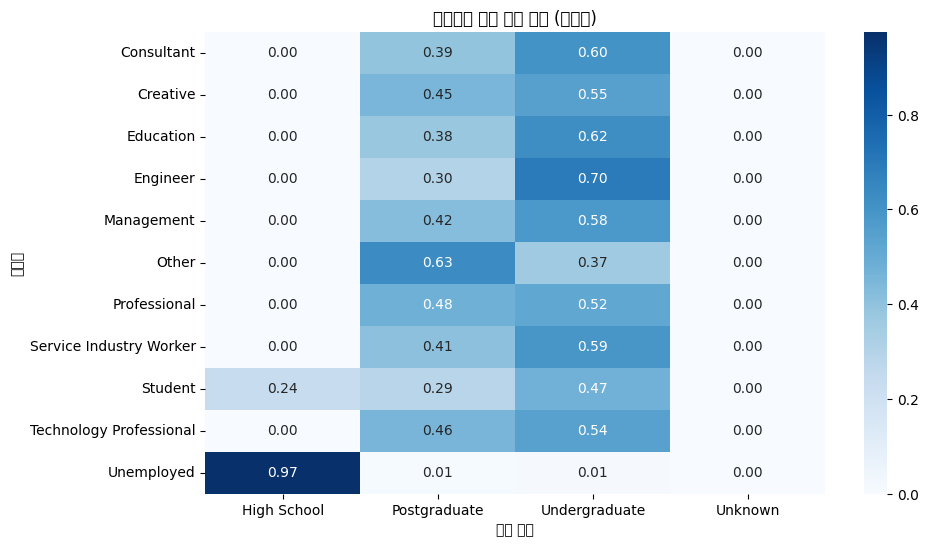

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

ct = pd.crosstab(df_demo['profession_group'], df_demo['degree_level'], normalize='index')  # 비율로 보기 좋음
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt=".2f")
plt.title('직업군별 학위 수준 비율 (정규화)')
plt.xlabel('학위 수준')
plt.ylabel('직업군')
plt.show()

도시/중소도시 성별 분포 비교 

In [412]:
age_crosstab = pd.crosstab(df_demo['age_group'], df_demo['urban_rural'], normalize='columns') * 100

age_ct = pd.crosstab(df_demo['age_group'], df_demo['urban_rural'])
chi2, p, dof, expected = chi2_contingency(age_ct)

print(f"Chi2 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")

Chi2 통계량: 66.41
p-value: 0.0000


In [413]:
alpha=0.05

if p < alpha:
    print("도시와 시골 간 나이 분포에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("도시와 시골 간 나이 분포에는 통계적으로 유의미한 차이가 없습니다.")

도시와 시골 간 나이 분포에는 통계적으로 유의미한 차이가 있습니다.


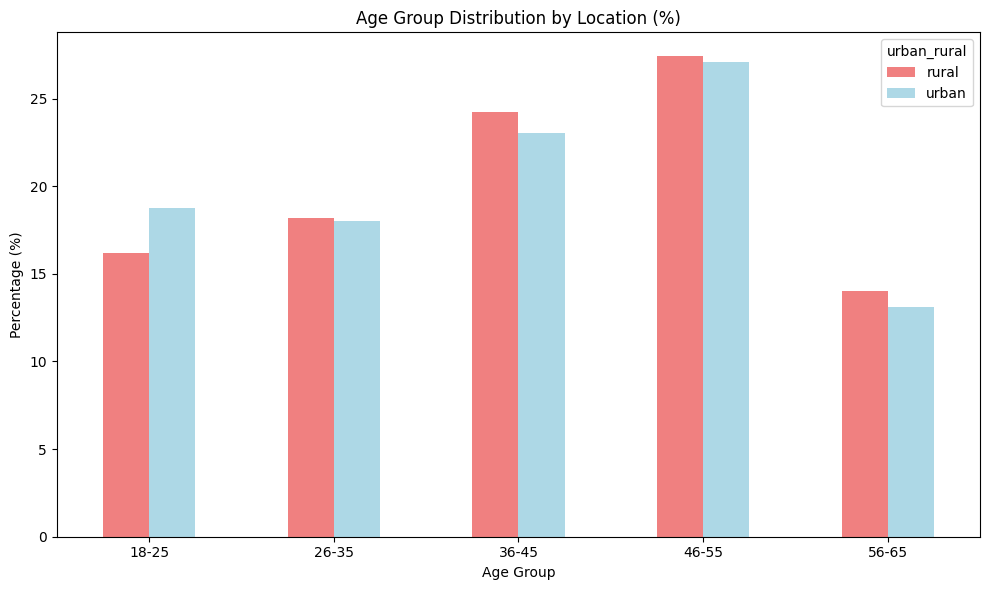

In [414]:
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
df_demo['age_group'] = pd.Categorical(df_demo['age_group'], categories=age_order, ordered=True)

age_crosstab = pd.crosstab(df_demo['age_group'], df_demo['urban_rural'], normalize='columns') * 100
age_crosstab = age_crosstab.loc[age_order]

age_crosstab.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'])

plt.title("Age Group Distribution by Location (%)")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

도시/중소도시 성별 분포 비교 

In [415]:
gender_crosstab = pd.crosstab(df_demo['gender'], df_demo['urban_rural'], normalize='columns') * 100

chi2_gen, p_gen, dof_gen, expected_gen = chi2_contingency(pd.crosstab(df_demo['gender'], df_demo['urban_rural']))
print(f"Chi2 통계량: {chi2_gen:.2f}")
print(f"p-value: {p_gen:.4f}")


Chi2 통계량: 14.31
p-value: 0.0002


In [416]:
if p_gen < alpha:
    print("도시와 시골 간 연령대 분포에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("도시와 시골 간 연령대 분포에 통계적으로 유의미한 차이가 없습니다.")

도시와 시골 간 연령대 분포에 통계적으로 유의미한 차이가 있습니다.


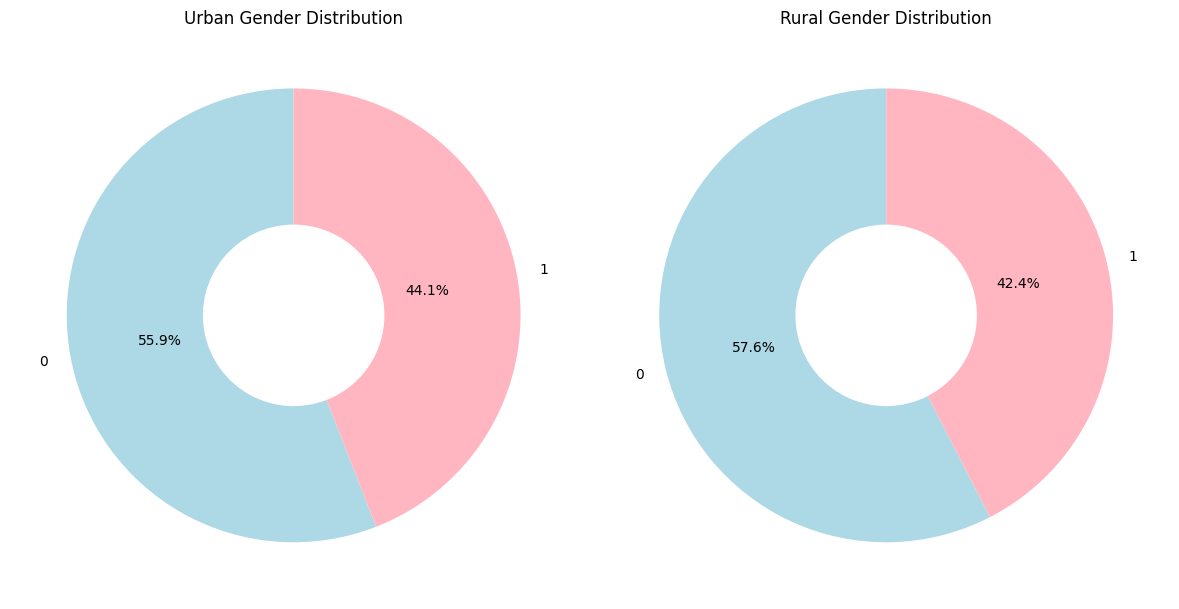

In [417]:
urban_gender = df_demo[df_demo['urban_rural'] == 'urban']['gender'].value_counts(normalize=True) * 100
rural_gender = df_demo[df_demo['urban_rural'] == 'rural']['gender'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['lightblue', 'lightpink']  # 남성, 여성 색상

# 도시
axs[0].pie(urban_gender, labels=urban_gender.index, autopct='%1.1f%%', colors=colors, startangle=90,wedgeprops={'width':0.6})
axs[0].set_title('Urban Gender Distribution')

# 중소도시
axs[1].pie(rural_gender, labels=rural_gender.index, autopct='%1.1f%%', colors=colors, startangle=90,wedgeprops={'width':0.6})
axs[1].set_title('Rural Gender Distribution')

plt.tight_layout()
plt.show()

도시／중소도시 직업 분포 비교 

In [418]:

# 교차표 생성
ct = pd.crosstab(df_demo['profession_group'], data['urban_rural'])

# 카이제곱 독립성 검정 수행
chi2_pro, p_pro, dof_pro, expected_pro = chi2_contingency(ct)

print(f"Chi2 통계량: {chi2_pro:.2f}")
print(f"p-value: {p_pro:.4f}")

Chi2 통계량: 91.53
p-value: 0.0000


In [419]:
if p_pro < alpha:
    print("도시와 시골 간 직업군 분포에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("도시와 시골 간 직업군 분포에는 통계적으로 유의미한 차이가 없습니다.")

도시와 시골 간 직업군 분포에는 통계적으로 유의미한 차이가 있습니다.


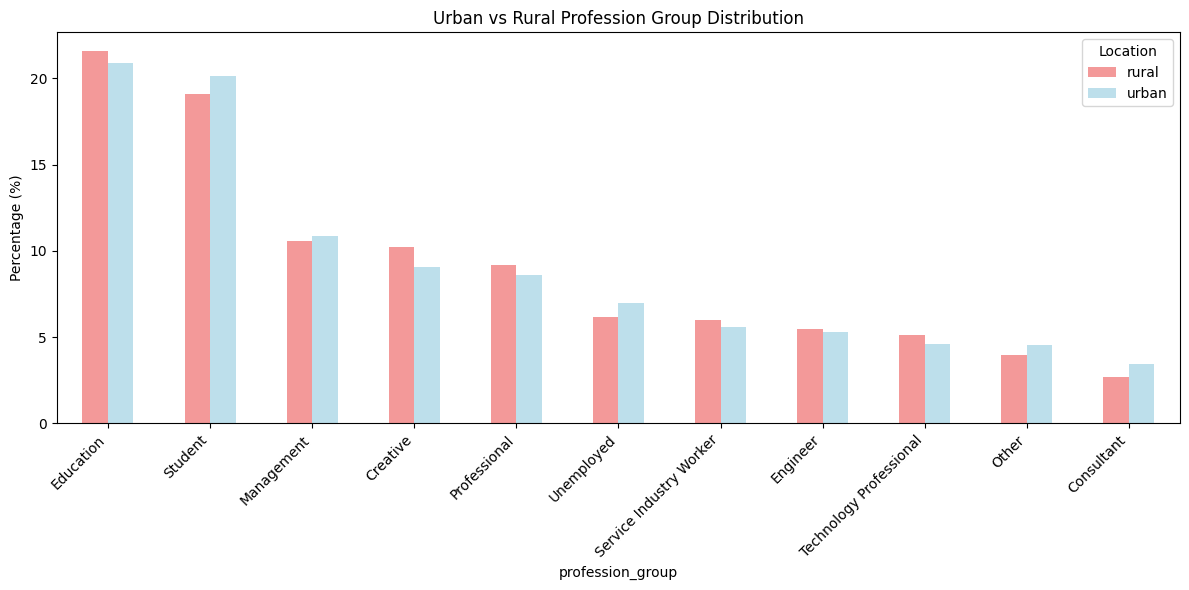

In [420]:
job_order = ct.sum(axis=1).sort_values(ascending=False).index

job_counts_percent = pd.crosstab(df_demo['profession_group'], df_demo['urban_rural'], normalize='columns') * 100
job_counts_percent = job_counts_percent.loc[job_order]

job_counts_percent.plot(kind='bar', figsize=(12,6), color=['lightcoral','lightblue'], alpha=0.8)
plt.title("Urban vs Rural Profession Group Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location')
plt.tight_layout()
plt.show()


도시/중소도시 학위 분포 비교 

In [421]:
degree_crosstab = pd.crosstab(df_demo['degree_level'], df_demo['urban_rural'], normalize='columns') * 100

# 카이제곱 검정
degree_raw_counts = pd.crosstab(df_demo['degree_level'], df_demo['urban_rural'])
chi2_de, p_de, dof_de, expected_de = chi2_contingency(degree_raw_counts)

print(f"Chi2 통계량: {chi2_de:.2f}")
print(f"p-value: {p_de:.4f}")

Chi2 통계량: 90.28
p-value: 0.0000


In [422]:
if p_de < alpha:
    print("도시와 시골 간 학위 수준 분포에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("도시와 시골 간 학위 수준 분포에 통계적으로 유의미한 차이가 없습니다.")

도시와 시골 간 학위 수준 분포에 통계적으로 유의미한 차이가 있습니다.


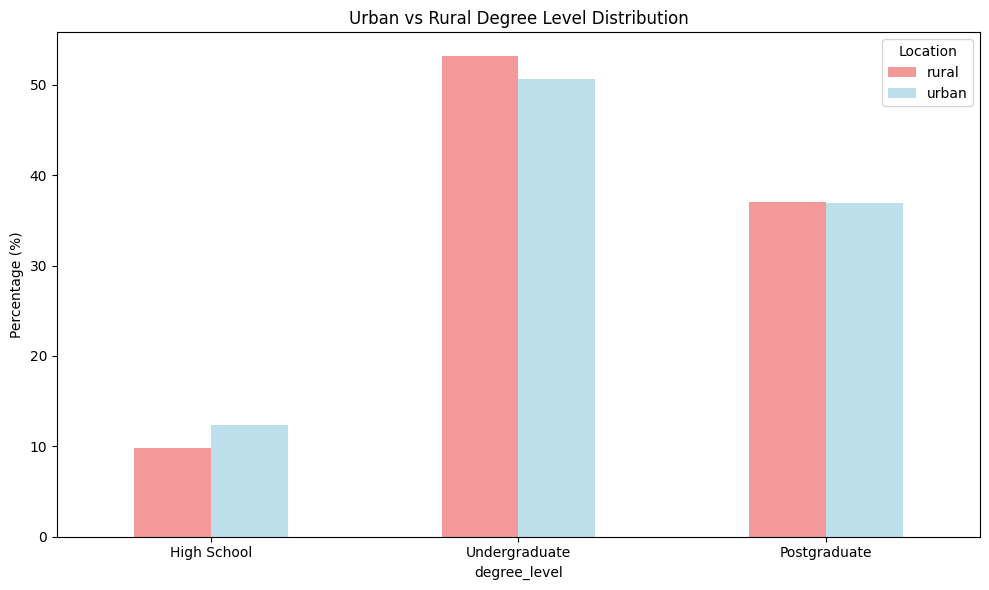

In [429]:
# 1. unknown 제거
valid_degrees = df_demo[df_demo['degree_level'].str.lower() != 'unknown']

# 2. 고정된 순서 지정
degree_order = ['High School', 'Undergraduate', 'Postgraduate']

# 3. 교차표 계산
degree_crosstab = pd.crosstab(
    valid_degrees['degree_level'],
    valid_degrees['urban_rural'],
    normalize='columns'
) * 100

# 4. 지정 순서로 정렬 (누락된 값은 0으로 처리)
degree_crosstab = degree_crosstab.reindex(degree_order).fillna(0)

# 5. 색상 자동 조절
colors = ['lightcoral', 'lightblue'][:degree_crosstab.shape[1]]

# 6. 그래프 출력
degree_crosstab.plot(kind='bar', figsize=(10, 6), color=colors, alpha=0.8)
plt.title("Urban vs Rural Degree Level Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

연령대와 직업군 사이에 통계적으로 유의미한 관계가 있을까? 

In [ ]:
age_job_crosstab = pd.crosstab(df_demo['age_group'], df_demo['profession_group'])

# 카이제곱 검정
chi2_aj, p_aj, dof_aj, expected_aj = chi2_contingency(age_job_crosstab)

print("Chi2 통계량:", round(chi2_aj, 2))
print("p-value:", round(p_aj, 4))

Chi2 통계량: 29215.76
p-value: 0.0


In [ ]:
if p_aj < alpha:
    print("연령대와 직업군 간에는 통계적으로 유의미한 관계가 있습니다.")
else:
    print("연령대와 직업군 간에는 통계적으로 유의미한 관계가 없습니다.")

연령대와 직업군 간에는 통계적으로 유의미한 관계가 있습니다.


C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1545779286.py:8: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1545779286.py:8: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1545779286.py:8: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1545779286.py:8: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1545779286.py:8: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1545779286.py:8: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s

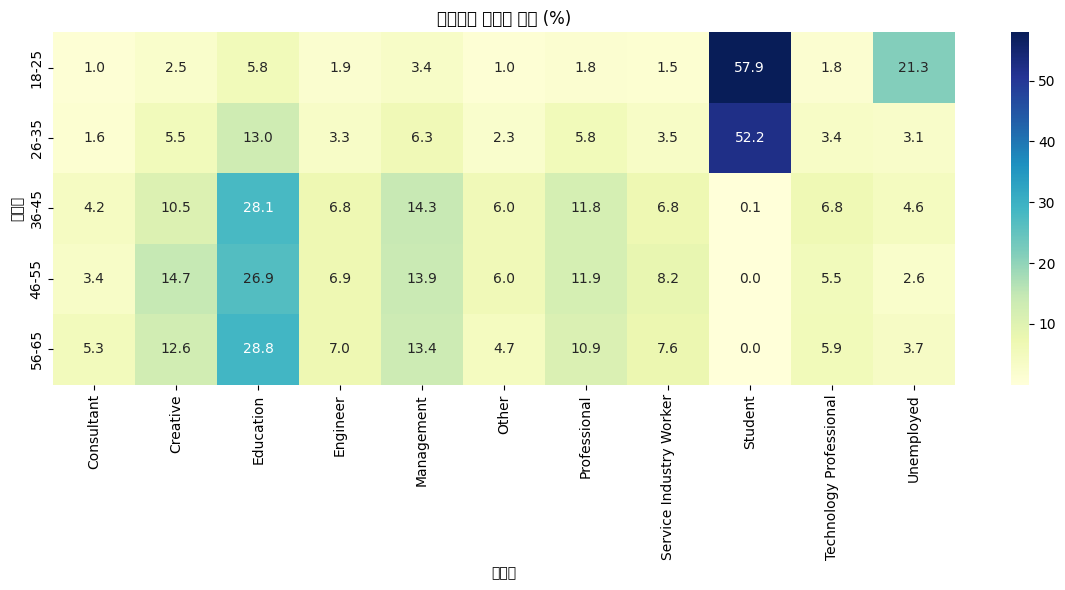

In [ ]:
heatmap_data = pd.crosstab(df_demo['age_group'], df_demo['profession_group'], normalize='index') * 100

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("연령대별 직업군 비율 (%)")
plt.xlabel("직업군")
plt.ylabel("연령대")
plt.tight_layout()
plt.show()

도시와 시골 학생 간 CGPA에 통계적으로 유의미한 차이가 있는가 

In [ ]:
students = df_demo[df_demo['profession_group'] == 'STU']

urban_students = students[students['urban_rural'] == 'urban']['cgpa'].dropna()
rural_students = students[students['urban_rural'] == 'rural']['cgpa'].dropna()

print("도시 학생 평균 CGPA:", round(urban_students.mean(), 2))
print("시골 학생 평균 CGPA:", round(rural_students.mean(), 2))

도시 학생 평균 CGPA: nan
시골 학생 평균 CGPA: nan


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(urban_students, rural_students, equal_var=False)

print(round(t_stat,2))
print(round(p_val,2))

nan
nan


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### 조사인구특성
- urban_rural 기준으로 "gender, age_group, profession, degree"의 빈도수와 비율을 계산하여 비교 - 막대 그래프, 파이 차트, 스택 바 차트       
- 동일성 검정 (카이제곱검정)        

In [ ]:
demo = ['gender','age_group','urban_rural','degree']
urban = data[data['urban_rural'] == 'urban']
rural = data[data['urban_rural'] == 'rural']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data.copy()

target_variables = ['gender', 'age_group', 'profession', 'degree']
group_column = 'urban_rural' 


#### 동일성 검정

In [ ]:
def chi2_test(dataframe, group_col, target_col, alpha=0.05):
    """
    Perform Chi-squared test of independence between two categorical variables.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        group_col (str): The column name for the grouping variable.
        target_col (str): The column name for the target variable.
        alpha (float): Significance level for the test (default is 0.05)

    if p_value < alpha: two colums are significantly related. = diffrent distribution
       p_value > alpha: two colums are not significantly related. = similar distribution
    """

    # 그룹 컬럼의 고유 값 확인 (두 개여야 함)
    unique_groups = dataframe[group_col].unique()
    group1_name, group2_name = unique_groups[0], unique_groups[1]

    # Create contingency table
    import pandas as pd
    from scipy.stats import chi2_contingency    
    contingency_table = pd.crosstab(dataframe[group_col], dataframe[target_col])

    # Perform Chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\n카이제곱 통계량: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    # 검정 결과 해석
    if p_value < alpha:
        print(f"'{group1_name}' 그룹과 '{group2_name}' 그룹에서 '{target_col}'의 분포는 다름")
    else:
        print(f"{group1_name}' 그룹과 '{group2_name}' 그룹에서 '{target_col}'의 분포는 동일")


target_variables = ['gender', 'age_group', 'profession', 'degree']

for var in target_variables:
    chi2_test(data, 'urban_rural', var)


카이제곱 통계량: 14.3063
p-value: 0.0002
'rural' 그룹과 'urban' 그룹에서 'gender'의 분포는 다름

카이제곱 통계량: 66.4090
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'age_group'의 분포는 다름

카이제곱 통계량: 261.2390
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'profession'의 분포는 다름

카이제곱 통계량: 343.4051
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'degree'의 분포는 다름


C:\Users\USER\AppData\Local\Temp\ipykernel_22000\3636438369.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right',fontsize=5)
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\3636438369.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right',fontsize=5)
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\3636438369.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right',fontsize=5)
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\3636438369.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i

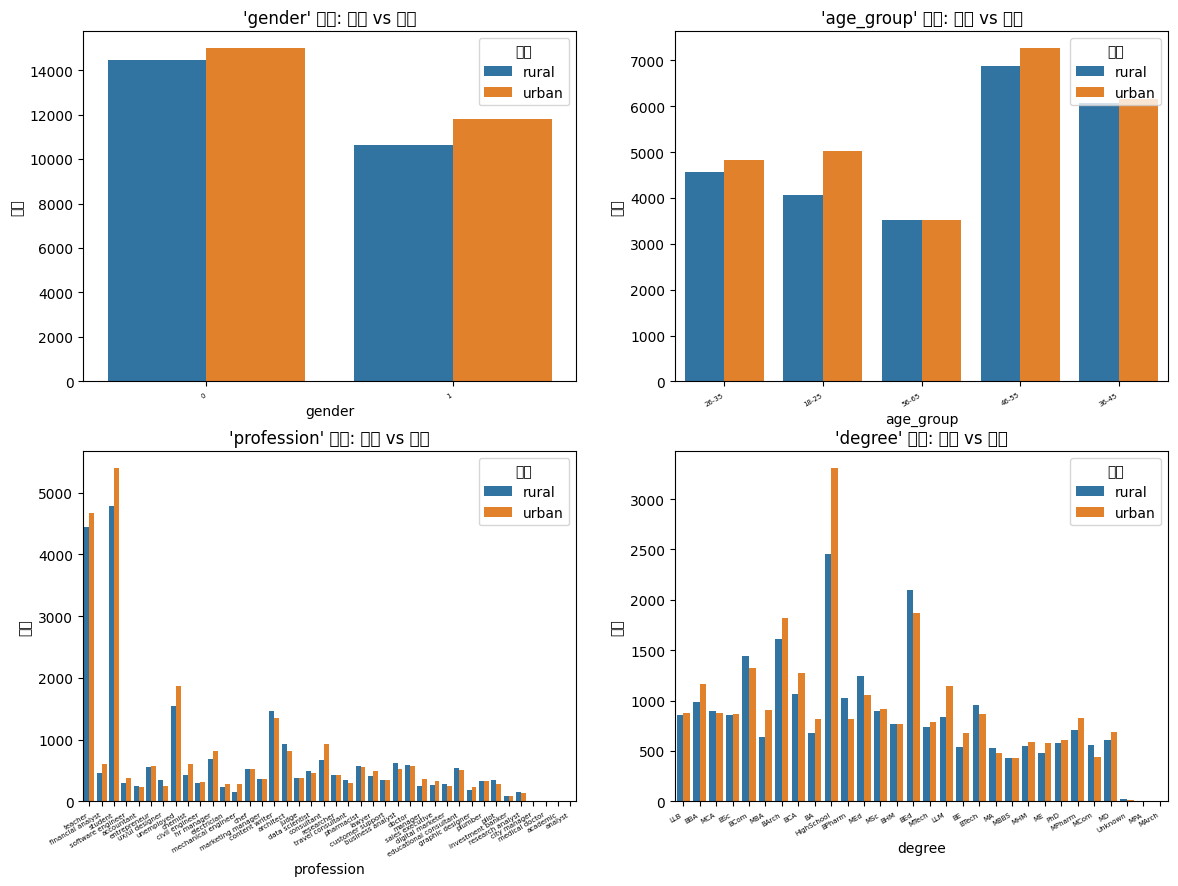

In [ ]:
categorical_columns = ['gender', 'age_group', 'profession', 'degree']

fig, axes= plt.subplots(2,2,figsize=(14,10))
axes=axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col,hue='urban_rural',ax=axes[i])
    axes[i].set_title(f"'{col}' 분포: 도시 vs 시골", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right',fontsize=5)
    axes[i].set_ylabel("개수")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title="지역", loc='upper right')


plt.show()


In [ ]:
def independent_t_test(dataframe, group_col, target_col, alpha=0.05):
    """
    두 독립 그룹 간에 특정 연속형 변수의 평균 차이를 독립표본 t-검정으로 검정합니다.
    등분산성(Levene's test)을 먼저 확인한 후, 그 결과에 따라 적절한 t-검정을 수행합니다.

    Args:
        dataframe (pd.DataFrame): 분석할 데이터프레임
        group_col (str): 두 그룹을 나누는 기준 컬럼 (예: 'urban_rural')
                         이 컬럼은 정확히 두 개의 고유한 값을 가져야 합니다
        target_col (str): 평균 차이를 검정할 연속형 변수 컬럼 (예: 'age', 'cgpa')
        alpha (float, optional): 유의수준 (기본값: 0.05)
    """
    print(f"\n--- '{group_col}' 그룹 간 '{target_col}' 평균 차이 독립표본 t-검정 ---\n")

    from scipy import stats

    # 그룹 컬럼의 고유 값 확인
    unique_groups = dataframe[group_col].unique()

    group1_name, group2_name = unique_groups[0], unique_groups[1]

    # 각 그룹별 데이터 추출 및 결측치 제거
    group1_data = dataframe[dataframe[group_col] == group1_name][target_col].dropna()
    group2_data = dataframe[dataframe[group_col] == group2_name][target_col].dropna()

    # 그룹별 기술 통계량 (평균, 표준편차) 확인
    print(f"  '{group1_name}' 그룹 '{target_col}' 평균: {group1_data.mean():.2f}, (표준편차: {group1_data.std():.2f}, N={len(group1_data)})")
    print(f"  '{group2_name}' 그룹 '{target_col}' 평균: {group2_data.mean():.2f}, (표준편차: {group2_data.std():.2f}, N={len(group2_data)})")

    # 1. 등분산성 검정 (Levene's test)
    # 귀무가설 (H0): 두 그룹의 분산이 동일하다.
    # 대립가설 (H1): 두 그룹의 분산이 다르다.
    levene_stat, levene_p_value = stats.levene(group1_data, group2_data)
    print(f"\n  Levene's Test (등분산성 검정) => 통계량: {levene_stat:.4f}, p-value: {levene_p_value:.4f}")

    # 2. 독립표본 t-검정 수행
    # p-value가 유의수준(0.05)보다 작으면 귀무가설 기각
    if levene_p_value > alpha: # 등분산 가정이 충족될 경우 (p > alpha)
        # 등분산 가정 하에 t-검정
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=True)
        print("  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)")
    else: # 등분산 가정이 충족되지 않을 경우 (p <= alpha)
        # 등분산 가정을 하지 않는 웰치(Welch)의 t-검정
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)
        print("  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)")

    if p_value < alpha:
        print(f"\n t-통계량: {t_stat:.4f}, p-value ({p_value:.4f}) : '{group1_name}' 그룹과 '{group2_name}' 그룹의 '{target_col}' 평균은 통계적으로 유의미하게 다릅니다.")
    else:
        print(f"\n t-통계량: {t_stat:.4f}, p-value ({p_value:.4f}) : '{group1_name}' 그룹과 '{group2_name}' 그룹의 '{target_col}' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움")


C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1623592753.py:11: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1623592753.py:11: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1623592753.py:11: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1623592753.py:11: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1623592753.py:11: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1623592753.py:11: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s)

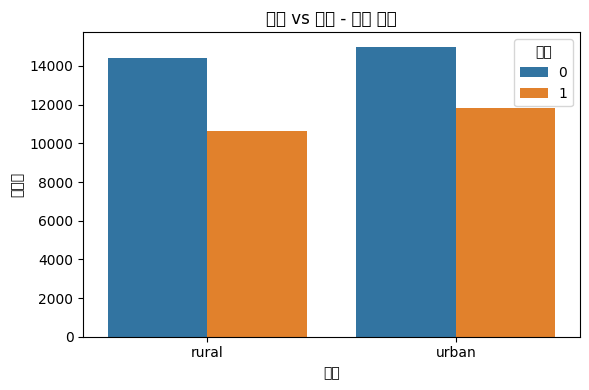

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# urban_rural 별 gender 비율 시각화
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='urban_rural', hue='gender')
plt.title("도시 vs 시골 - 성별 분포")
plt.xlabel("지역")
plt.ylabel("빈도수")
plt.legend(title="성별")
plt.tight_layout()
plt.show()

### 라이프스타일 비교 - urban_rural 그룹별 sleep_duration, dietary_habits, work_study_hours

- 라이프스타일 특성  : 평균,중앙값,표준분포 및 분포  (범주형 vs 수치형 : Box plot, Violin plot)        

- 라이프스타일 검정 (동일성)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51880 entries, 0 to 51879
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       51880 non-null  int64  
 1   name                     51880 non-null  object 
 2   gender                   51880 non-null  int64  
 3   age                      51880 non-null  float64
 4   age_group                51880 non-null  object 
 5   city                     51880 non-null  object 
 6   profession               51880 non-null  object 
 7   cgpa                     51880 non-null  float64
 8   degree                   51880 non-null  object 
 9   work_study_pressure      51880 non-null  float64
 10  work_study_satisfaction  51880 non-null  float64
 11  financial_stress         51880 non-null  float64
 12  sleep_duration           51880 non-null  object 
 13  dietary_habits           51880 non-null  object 
 14  work_study_hours      

In [ ]:
# 라이프 스타일은 다르게 나오는 것이 좋음

In [ ]:
target_variables = ['sleep_duration', 'dietary_habits']

for var in target_variables:
    chi2_test(df, 'urban_rural', var)


카이제곱 통계량: 42.2019
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'sleep_duration'의 분포는 다름

카이제곱 통계량: 41.2926
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'dietary_habits'의 분포는 다름


In [ ]:
independent_t_test(df, 'urban_rural', 'work_study_hours')


--- 'urban_rural' 그룹 간 'work_study_hours' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_hours' 평균: 6.26, (표준편차: 3.84, N=25072)
  'urban' 그룹 'work_study_hours' 평균: 6.28, (표준편차: 3.83, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 0.0866, p-value: 0.7685
  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)

 t-통계량: -0.6232, p-value (0.5332) : 'rural' 그룹과 'urban' 그룹의 'work_study_hours' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움


### 스트레스지표 비교 - urban_rural 그룹별 work_study_pressure, financial_stress 
- 지역별 스트레스 특성 : 평균 및 분포 비교      
- 스트레스 검정 (동일성)

In [ ]:
# 스트레스 지표는 다르게 나오는 것이 좋음
target_variables = ['work_study_pressure', 'financial_stress', 'work_study_satisfaction']

for var in target_variables:
    independent_t_test(df, 'urban_rural', var)


--- 'urban_rural' 그룹 간 'work_study_pressure' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_pressure' 평균: 3.04, (표준편차: 1.38, N=25072)
  'urban' 그룹 'work_study_pressure' 평균: 3.06, (표준편차: 1.41, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 15.3446, p-value: 0.0001
  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)

 t-통계량: -2.0729, p-value (0.0382) : 'rural' 그룹과 'urban' 그룹의 'work_study_pressure' 평균은 통계적으로 유의미하게 다릅니다.

--- 'urban_rural' 그룹 간 'financial_stress' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'financial_stress' 평균: 2.98, (표준편차: 1.41, N=25072)
  'urban' 그룹 'financial_stress' 평균: 3.02, (표준편차: 1.42, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 5.9641, p-value: 0.0146
  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)

 t-통계량: -3.5745, p-value (0.0004) : 'rural' 그룹과 'urban' 그룹의 'financial_stress' 평균은 통계적으로 유의미하게 다릅니다.

--- 'urban_rural' 그룹 간 'work_study_satisfaction' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_satisfaction' 평균: 3.00, (표준편차: 1.39, N=25072)
  'urban' 그룹 'work_study_satisfaction' 평균: 2.

### 정신건강지표 비교 - urban_rural 그룹별 suidial_thoughts, depression
- 정신건강지표 특성 : 발생률(비율)비교, study_work_satisfaction의 평균 및 분포를 비교 (범주형 vs 범주형 : stacked bar chart)          
- 정신건강 검정(동일성)

In [ ]:
# 정신건강 지표는 다르게 나오는 것이 좋음 - 가설은 도시가 더 좋을 것이다.
# 스트레스 지표는 다르게 나오는 것이 좋음
target_variables = ['suicidal_thoughts', 'depression']

for var in target_variables:
    chi2_test(df, 'urban_rural', var)


카이제곱 통계량: 4.3372
p-value: 0.0373
'rural' 그룹과 'urban' 그룹에서 'suicidal_thoughts'의 분포는 다름

카이제곱 통계량: 65.1902
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'depression'의 분포는 다름


### 상관 분석
- urban_rural 그룹별 : sleep_duration, dietary_habits(수치화 후),work_study_hours 와 depression, suidial_thoughts, work_study_satisfaction 간의 상관관계              
- 전체 데이터에서의 상관관계                